<a href="https://colab.research.google.com/github/Pratichhya/ForestFire/blob/main/forestFire_RF_SVM_compared.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install rasterio

     |████████████████████████████████| 19.1MB 52.7MB/s 


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

import rasterio

In [4]:
dataframe=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ranPtgenerated.csv",delimiter=";")

In [5]:
#statistical distribution of data
statistical= dataframe.describe()

In [6]:
dataframe.head()

,OBJECTID,CID,blue,green,red,nir,swir,GT
0,1,1,380.0,634.0,1004.0,1626.0,2898.0,0.0
1,2,1,248.0,406.0,544.0,1402.0,1328.0,1.0
2,3,1,771.0,1046.0,1396.0,2186.0,2787.0,0.0
3,4,1,585.0,847.0,1124.0,1970.0,3440.0,0.0
4,5,1,1334.0,716.0,837.0,2066.0,1688.0,0.0


In [7]:
dataframe = dataframe.dropna(how='any',axis=0) 

In [8]:
#separation of x and y
x = dataframe.drop(['GT','CID','OBJECTID'], 1)
y = dataframe.iloc[:, -1:]

In [9]:
xx=x.to_numpy()
yy=y.to_numpy().squeeze()
print("shapes,",xx.shape,yy.shape)

shapes, (9995, 5) (9995,)


In [10]:
#split training and testing set from main dataset
x_train,x_test,y_train,y_test = train_test_split(xx,yy,test_size = 0.2)
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.1)

SVM model

Training the model

In [ ]:
#fit the model with linear kernel
model_linear = SVC(kernel = "linear")
model_linear.fit(x_train,y_train)

#predict
pred_test_linear = model_linear.predict(x_test)

In [ ]:
#fit the model with radial kernel
model_rbf = SVC(kernel = "rbf")
model_rbf.fit(x_train,y_train)

#predict
pred_test_rbf = model_rbf.predict(x_test)

In [ ]:
#confusion matrix
print("Confusion matrix for Liner Kernel:")
print(confusion_matrix(y_test, pred_test_linear))

print("Confusion matrix for Radial Kernel:")
print(confusion_matrix(y_test, pred_test_rbf))

Confusion matrix for Liner Kernel:
[[832 122]
 [173 872]]
Confusion matrix for Radial Kernel:
[[780 174]
 [ 84 961]]


In [ ]:
#evaluating linear kernel model
# Model Accuracy: how often is the classifier correct?
print("Accuracy by Linear Kernel:",metrics.accuracy_score(y_test, pred_test_linear))

#evaluating linear kernel model
# Model Accuracy: how often is the classifier correct?
print("Accuracy by Radial Kernel:",metrics.accuracy_score(y_test, pred_test_rbf))

Accuracy by Linear Kernel: 0.8524262131065533
Accuracy by Radial Kernel: 0.870935467733867


In [ ]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision by Linear Kernel:",metrics.precision_score(y_test, pred_test_linear))
print("Precision by Radial Kernel:",metrics.precision_score(y_test, pred_test_rbf))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall by Linear Kernel:",metrics.recall_score(y_test, pred_test_linear))
print("Recall by Radial Kernel:",metrics.recall_score(y_test, pred_test_rbf))

Precision by Linear Kernel: 0.8772635814889336
Precision by Radial Kernel: 0.8466960352422908
Recall by Linear Kernel: 0.8344497607655502
Recall by Radial Kernel: 0.9196172248803828


Testing the model

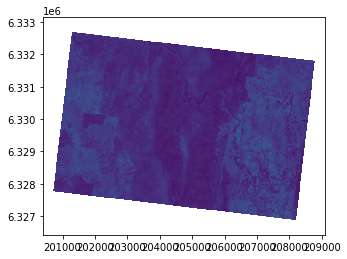

In [21]:
#to load satellite image load it with raster io
from rasterio.plot import show
fp = r'/content/drive/MyDrive/Colab Notebooks/stacked_test_clipped.tif'
img = rasterio.open(fp)
show(img)

In [22]:
blue=img.read(1).flatten()
green=img.read(2).flatten()
red=img.read(3).flatten()
nir=img.read(4).flatten()
swir=img.read(5).flatten()

In [23]:
dataread=img.read()
dataread.shape

(5, 672, 870)

In [24]:
data=np.stack([blue,green,red,nir,swir],axis=1)

In [25]:
data.shape

(584640, 5)

In [ ]:
results=model_rbf.predict(data)

In [ ]:
preds=results.reshape((672, 870))

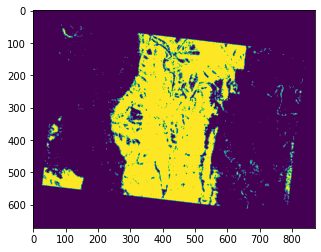

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(preds.astype(int))

In [ ]:
# Register GDAL format drivers and configuration options with a
# context manager.
with rasterio.Env():

    # Write an array as a raster band to a new 8-bit file. For
    # the new file's profile, we start with the profile of the source
    profile = img.profile

    # And then change the band count to 1, set the

    profile.update(
        dtype=rasterio.uint8,
        count=1,
        compress='lzw',
        nodata=0
        )

    with rasterio.open('/content/drive/MyDrive/Colab Notebooks/RBF_SVM_prediction_test.tif', 'w', **profile) as dst:
        dst.write(preds.astype(rasterio.uint8), 1)


In [ ]:
profile

{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': 0, 'width': 870, 'height': 672, 'count': 1, 'crs': CRS.from_epsg(32756), 'transform': Affine(9.998369681922753, 0.0, 200391.72329467698,
       0.0, -9.987380313523492, 6333139.604107562), 'blockxsize': 128, 'blockysize': 128, 'tiled': True, 'compress': 'lzw', 'interleave': 'pixel'}

Random Forest Starting 

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [44]:
oobdf=pd.DataFrame(columns=['nestimator','oob'])
j=1
for i in range(1,1001,20):
  #Create a Gaussian Classifier
  clf=RandomForestClassifier(n_estimators=i-1,oob_score=True,max_depth=10)
  #Train the model using the training sets y_pred=clf.predict(x_test)
  clf.fit(x_train, y_train)
  oob=clf.oob_score_
  oobdf.loc[j]=[i,oob]
  j+=1

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


In [64]:
oobdf

,nestimator,oob
1,1.0,0.626459
2,21.0,0.886882
3,41.0,0.890356
4,61.0,0.891884
5,81.0,0.893274
6,101.0,0.890078
7,121.0,0.892301
8,141.0,0.892023
9,161.0,0.893830
10,181.0,0.893691


In [78]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=780,oob_score=True)
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=780,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

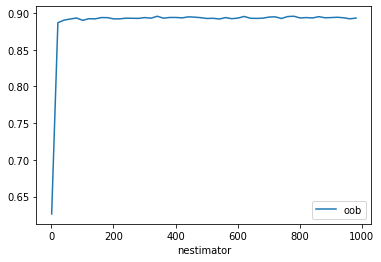

In [90]:
oobdf.plot.line(x="nestimator",y="oob")

In [82]:
y_pred_RF=clf.predict(x_test)

In [83]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_RF))

Accuracy: 0.8929464732366184


In [84]:
#confusion matrix
print("Confusion matrix for RF:")
print(confusion_matrix(y_test, y_pred_RF))


Confusion matrix for RF:
[[847 106]
 [108 938]]


Testing Random Forest on image

In [85]:
result_RF=clf.predict(data)

In [86]:
preds_RF=result_RF.reshape((672, 870))

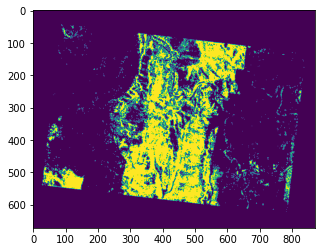

In [87]:
import matplotlib.pyplot as plt
plt.imshow(preds_RF.astype(int))

In [88]:
#Register GDAL format drivers and configuration options with a
# context manager.
with rasterio.Env():

    # Write an array as a raster band to a new 8-bit file. For
    # the new file's profile, we start with the profile of the source
    profile = img.profile

    # And then change the band count to 1, set the

    profile.update(
        dtype=rasterio.uint8,
        count=1,
        compress='lzw',
        nodata=0
        )

    with rasterio.open('/content/drive/MyDrive/Colab Notebooks/RandomForest_prediction_test.tif', 'w', **profile) as dst:
        dst.write(preds_RF.astype(rasterio.uint8), 1)